<a href="https://colab.research.google.com/github/Dau2004/Group_3_Water_Portability_formative/blob/Eddy/Eddy_Water_Quality_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Library Import, Data Loading & Preprocessing

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')


In [49]:
# Loading the dataset
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1H_kRGjtavba31uVjs-HILSNirokfz1R0MZa64ov4NR8/export?format=csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [50]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [51]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()


,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [52]:
# save this clean data with out any missing values
df.to_csv('cleaned_water_potability.csv', index=False)


In [53]:
df.duplicated().sum()

np.int64(0)

# Separate features and target


In [54]:
# Use full feature set (9 features)
X = df.drop("Potability", axis=1)
y = df["Potability"]

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(X_train.shape)  # You should see (2293, 9)
# Confirm shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2293, 9)
(2293, 9)
(492, 9)
(2293,)
(492,)


# Step 2: Model Architecture & Training Configurations

In [70]:
# Model Definition by Eddy
def model_eddy():
  model = Sequential([
      Dense(32, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l1(0.001)),
      Dropout(0.2),
      Dense(64, activation='relu', kernel_regularizer=l1(0.001)),
      Dropout(0.2),
      Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
      Dropout(0.2),
      Dense(1, activation='sigmoid')
  ])
  model.compile(
      optimizer= SGD(learning_rate=0.010, momentum=0.9),
      loss='binary_crossentropy',
      metrics=['accuracy', 'precision', 'recall']
  )

  return model

# Step 3: Model Training & Evaluation


Epoch 51: early stopping
Restoring model weights from the end of the best epoch: 41.
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Final Results:
Train  - Accuracy: 0.694, Precision: 0.666, Recall: 0.434
Test   - Accuracy: 0.697, Precision: 0.694, Recall: 0.401, F1 Score: 0.508


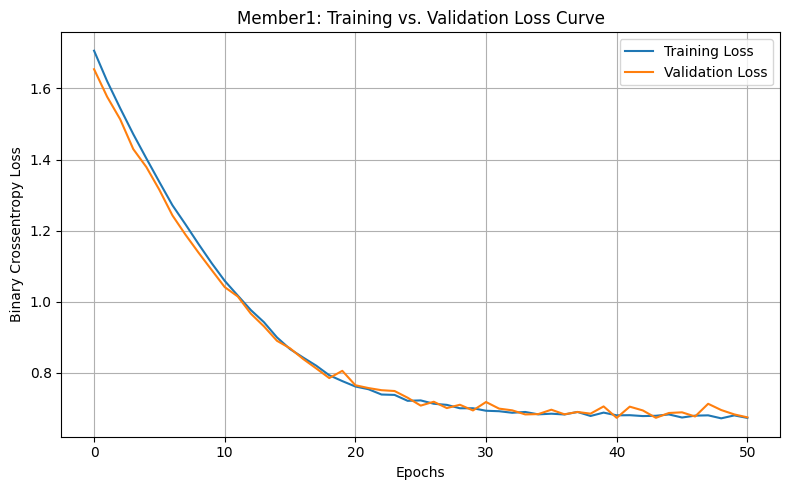

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,764 (85.02 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,883 (42.52 KB)

In [72]:
# 1. Build  model (with SGD)
model = model_eddy()
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.010, momentum=0.9 , weight_decay=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

# 2. EarlyStopping: stop if val_loss doesn’t improve for 5 epochs (Member1’s choice)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Compute class weights based on training labels
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# 3. Train the model with validation monitoring
trained_model = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1000,
    verbose=0,
    callbacks=[early_stop],
    class_weight=class_weights
)

# 4. Evaluate performance on both training and testing sets
train_loss, train_acc, train_precision, train_recall = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc, test_precision, test_recall   = model.evaluate(X_test, y_test, verbose=0)

# 4.1 Compute F1 Score
y_pred_prob = model.predict(X_test).ravel()
y_pred_binary = (y_pred_prob > 0.5).astype(int)
f1 = f1_score(y_test, y_pred_binary)


print(f"Final Results:")
print(f"Train  - Accuracy: {train_acc:.3f}, Precision: {train_precision:.3f}, Recall: {train_recall:.3f}")
print(f"Test   - Accuracy: {test_acc:.3f}, Precision: {test_precision:.3f}, Recall: {test_recall:.3f}, F1 Score: {f1:.3f}")

# 5. Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(trained_model.history['loss'], label='Training Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.title("Member1: Training vs. Validation Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

model.summary()

#Step 4: Model result interpretation & Explanation


Final Evaluation Metrics (Epoch 51 Early Stop):
Accuracy: 0.697
Precision: 0.694
Recall: 0.401
F1 Score: 0.508

----------------------------
Interpretation:

1. Accuracy (69.7%):
- Overall correct predictions.
- May still be misleading if classes are imbalanced.

2. Precision (69.4%):
- When the model predicts potability, it's correct 69.4% of the time.
- Indicates fewer false positives.

3. Recall (40.1%):
- Only 40.1% of actual potable cases were correctly identified.
- High number of false negatives.

4. F1 Score (50.8%):
- Harmonic mean of precision and recall.
- Moderately low due to poor recall.

----------------------------
Hyperparameter Influence:

- Learning Rate:
  • Too high → instability, overshooting minima → poor generalization.
  • Too low → slow or incomplete training → reduced recall.

- Dropout Rate:
  • Too low → overfitting → model memorizes data, fails to generalize.
  • Too high → underfitting → model fails to learn complex features.

- Early Stopping:
  • May prevent the model from reaching better recall if training halts prematurely.